In [27]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

## NOTES

Source: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
    
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# DAY

In [12]:
day = pd.read_csv("day.csv")

# pd.read_excel('File.xlsx', sheetname='Sheet1')

In [15]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [18]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
day.corr().style.background_gradient(cmap='coolwarm')

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1,0.412224,0.866025,0.496702,0.0161446,-1.61791e-05,-0.00433654,-0.0214772,0.15058,0.152638,0.0163747,-0.11262,0.275255,0.659623,0.62883
season,0.412224,1,-0.00184434,0.83144,-0.0105367,-0.00307988,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.4061
yr,0.866025,-0.00184434,1,-0.00179243,0.00795431,-0.00546077,-0.00201262,-0.0487265,0.0476036,0.0461061,-0.110651,-0.0118171,0.248546,0.594248,0.56671
mnth,0.496702,0.83144,-0.00179243,1,0.0191909,0.00950931,-0.00590095,0.0435281,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.0161446,-0.0105367,0.00795431,0.0191909,1,-0.10196,-0.253023,-0.0346268,-0.0285555,-0.0325067,-0.0159375,0.00629151,0.0542742,-0.108745,-0.0683477
weekday,-1.61791e-05,-0.00307988,-0.00546077,0.00950931,-0.10196,1,0.0357897,0.0310875,-0.000169962,-0.00753713,-0.0522321,0.0142821,0.0599226,0.0573674,0.0674434
workingday,-0.00433654,0.012485,-0.00201262,-0.00590095,-0.253023,0.0357897,1,0.0612004,0.0526598,0.0521823,0.024327,-0.0187965,-0.518044,0.303907,0.0611561
weathersit,-0.0214772,0.019211,-0.0487265,0.0435281,-0.0346268,0.0310875,0.0612004,1,-0.120602,-0.121583,0.591045,0.0395111,-0.247353,-0.260388,-0.297391
temp,0.15058,0.334315,0.0476036,0.220205,-0.0285555,-0.000169962,0.0526598,-0.120602,1,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.0461061,0.227459,-0.0325067,-0.00753713,0.0521823,-0.121583,0.991702,1,0.139988,-0.183643,0.543864,0.544192,0.631066


In [22]:
day.shape

(731, 16)

## What is the effect of count as weather gets increasingly worse? 

#### cnt: count of total rental bikes including both casual and registered 
#### + weathersit :
#### - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#### - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#### - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#### - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

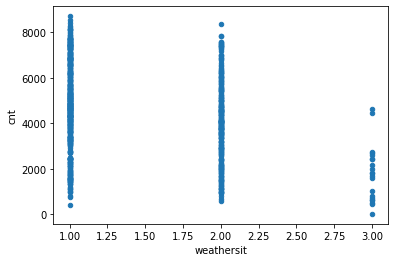

In [31]:
day.plot('weathersit','cnt',kind='scatter')

In [33]:
X = pd.DataFrame({'weathersit' : day['weathersit']})
X = sm.add_constant(X)
y = day['cnt']

regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     70.73
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           2.15e-16
Time:                        13:53:50   Log-Likelihood:                -6535.8
No. Observations:                 731   AIC:                         1.308e+04
Df Residuals:                     729   BIC:                         1.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5979.6330    188.303     31.755      0.000    5609.953    6349.313
weathersit -1057.2870    125.717     -8.410      0.000   -1304.097    -810.477
==============================================================================
Omnibus:                       36.452   Durbin-Watson:                   0.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.102
Skew:                          -0.044   Prob(JB):                     0.000525
Kurtosis:                       2.301   Cond. No.                         5.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(1000, 5500)

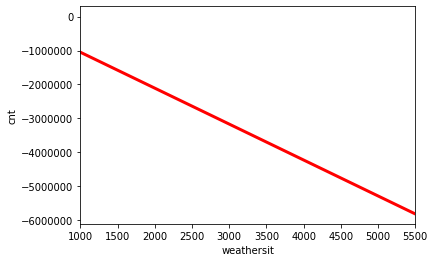

In [32]:
# coef of dependent variable > slope
# coef of independent variable > y-intercept

slope = -1057.2870
intercept = 5976.6330
ax = day.plot('weathersit','cnt',kind='scatter')
xx = np.linspace(1000, 5500, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1000,5500])

# HOUR

In [16]:
hour = pd.read_csv("hour.csv")

In [17]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [19]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
hour.corr().style.background_gradient(cmap='coolwarm')

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1,0.404046,0.866014,0.489164,-0.00477481,0.0147235,0.00135682,-0.00341556,-0.0141976,0.136178,0.137615,0.00957677,-0.0745045,0.158295,0.282046,0.278379
season,0.404046,1,-0.0107425,0.830386,-0.0061169,-0.00958453,-0.00233535,0.0137431,-0.0145236,0.312025,0.31938,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.0107425,1,-0.0104729,-0.003867,0.00669162,-0.00448485,-0.00219601,-0.0191569,0.0409134,0.0392216,-0.0835464,-0.00873953,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.0104729,1,-0.00577191,0.0184303,0.0104001,-0.00347692,0.00539952,0.201691,0.208096,0.164411,-0.135386,0.0684573,0.122273,0.120638
hr,-0.00477481,-0.0061169,-0.003867,-0.00577191,1,0.000479136,-0.00349774,0.002285,-0.0202025,0.137603,0.13375,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.0147235,-0.00958453,0.00669162,0.0184303,0.000479136,1,-0.102088,-0.252471,-0.0170361,-0.0273405,-0.0309727,-0.0105885,0.00398763,0.0315636,-0.0473454,-0.0309273
weekday,0.00135682,-0.00233535,-0.00448485,0.0104001,-0.00349774,-0.102088,1,0.0359551,0.00331074,-0.00179493,-0.00882094,-0.0371583,0.0115015,0.0327214,0.0215779,0.0268999
workingday,-0.00341556,0.0137431,-0.00219601,-0.00347692,0.002285,-0.252471,0.0359551,1,0.0446722,0.0553903,0.0546672,0.0156875,-0.0118298,-0.300942,0.134326,0.0302844
weathersit,-0.0141976,-0.0145236,-0.0191569,0.00539952,-0.0202025,-0.0170361,0.00331074,0.0446722,1,-0.10264,-0.105563,0.41813,0.0262257,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.0409134,0.201691,0.137603,-0.0273405,-0.00179493,0.0553903,-0.10264,1,0.987672,-0.0698814,-0.0231253,0.459616,0.335361,0.404772


In [23]:
hour.shape

(17379, 17)